# Optimization using Gradient Descent in Two Variables

Now that we've learned how gradient descent works for a function of one variable, let's extend it to functions of multiple variables. The core concept remains the same, but instead of using a simple derivative to find our direction, we will use the **gradient**.

Let's go back to our two-dimensional sauna example. The temperature in the 5x5 meter room is described by a 3D surface, and our goal is to find the coolest spot.

In the previous lesson, we solved this analytically by finding where both partial derivatives were zero. Now, let's try to solve it with an iterative approach, just as we did for the 1D function.

A simple (but inefficient) method would be to:
1.  Start at some point.
2.  Take a few random steps in different directions.
3.  Check the temperature at each new point.
4.  Move to the point with the lowest temperature.
5.  Repeat.

By iterating this process, we would eventually get close to the minimum. However, taking random steps is not very smart. Is there a better way to find the best direction to move? Just as the derivative gave us the best direction in 1D, the **gradient** will give us the best direction in 2D.

![](./images/0401.png)

---

# The Gradient Descent Algorithm in Two Variables

Recall that for a function of two variables, the gradient vector `∇T` at any point has a special property:
> **The gradient points in the direction of the steepest ascent.**

This means if you want to get hotter as fast as possible in the sauna, you should take a step in the direction of the gradient.

But we want to get *colder*. Therefore, the best direction to move is the **opposite** of the gradient, or the **negative gradient, -∇T**. This is the direction of steepest descent.

![](./images/0402.png)

This is the key insight behind the Gradient Descent algorithm. At every step, we calculate the gradient and move a small amount in the opposite direction.

The formula is a direct extension of the one-variable case. To find our new, improved position, we take a step from our old position in the direction of the negative gradient.

$$ \begin{bmatrix} x_{new} \\ y_{new} \end{bmatrix} = \begin{bmatrix} x_{old} \\ y_{old} \end{bmatrix} - \alpha \cdot \nabla T(x_{old}, y_{old}) $$

Where:
* $\begin{bmatrix} x \\ y \end{bmatrix}$ is our position vector.  

* $\alpha$ (alpha) is the **learning rate**.  

* $\nabla T$ is the **gradient vector**: $ \begin{bmatrix} \frac{\partial T}{\partial x} \\ \frac{\partial T}{\partial y} \end{bmatrix} $

---

## A Step-by-Step Numerical Example

Let's run the first few steps of the algorithm by hand to see how it works.

**The Temperature Function:**
$$ T(x, y) = 85 - \frac{1}{90}(x^3 - 6x^2)(y^3 - 6y^2) $$

**The Gradient Vector (from the previous lesson):**
$$ \nabla T = \begin{bmatrix} -\frac{1}{90} (3x^2 - 12x)(y^3 - 6y^2) \\ -\frac{1}{90} (x^3 - 6x^2)(3y^2 - 12y) \end{bmatrix} $$

**Parameters:**
* **Starting Point:** `(x₀, y₀) = (0.5, 0.6)`
* **Learning Rate (α):** `0.05`

### Iteration 1
1.  **Calculate the gradient at (0.5, 0.6):**  
    * $\frac{\partial T}{\partial x} \approx -0.114$  

    * $\frac{\partial T}{\partial y} \approx -0.095$  

    * $\nabla T(0.5, 0.6) = \begin{bmatrix} -0.114 \\ -0.095 \end{bmatrix}$

2.  **Update our position:**
    $$ \begin{bmatrix} x_1 \\ y_1 \end{bmatrix} = \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix} - 0.05 \cdot \begin{bmatrix} -0.114 \\ -0.095 \end{bmatrix} $$
    $$ = \begin{bmatrix} 0.5 \\ 0.6 \end{bmatrix} - \begin{bmatrix} -0.0057 \\ -0.00475 \end{bmatrix} = \begin{bmatrix} 0.5057 \\ 0.60475 \end{bmatrix} $$  

After one step, we have moved from `(0.5, 0.6)` to approximately `(0.506, 0.605)`, which is a small step closer to the minimum.

We would then repeat this process from our new point, calculating the new gradient and taking another step.

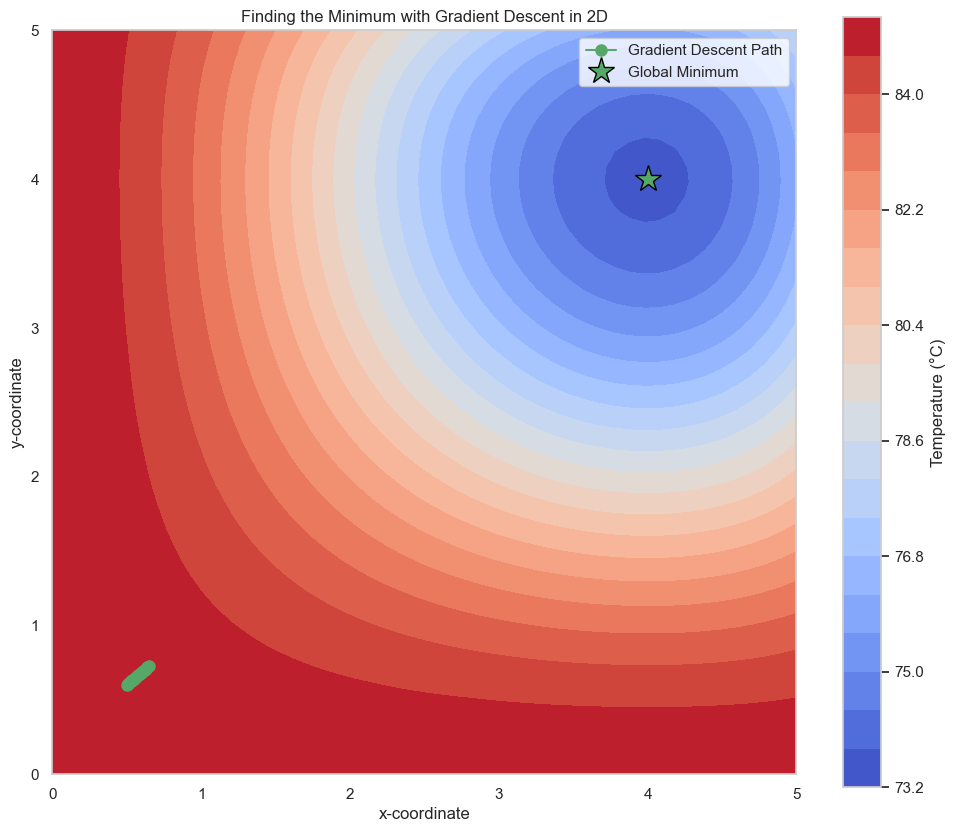

In [2]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the theme for the plots
sns.set_theme(style="whitegrid")

# --- Define the temperature function and its gradient ---
def temp_func(x, y):
    term1 = (x**2) * (x - 6)
    term2 = (y**2) * (y - 6)
    return 85 - (1/90) * term1 * term2

def temp_gradient(x, y):
    # Partial derivative with respect to x
    dT_dx = (-1/90) * (3*x**2 - 12*x) * (y**3 - 6*y**2)
    # Partial derivative with respect to y
    dT_dy = (-1/90) * (x**3 - 6*x**2) * (3*y**2 - 12*y)
    return np.array([dT_dx, dT_dy])

# --- Gradient Descent Parameters ---
learning_rate = 0.05
start_point = np.array([0.5, 0.6])
num_iterations = 20

# --- Store the path of the descent ---
path = [start_point]
current_point = start_point.copy()

for i in range(num_iterations):
    gradient = temp_gradient(current_point[0], current_point[1])
    current_point = current_point - learning_rate * gradient
    path.append(current_point)

path = np.array(path)

# --- Create the 2D contour plot ---
fig, ax = plt.subplots(figsize=(12, 10))
x_grid = np.linspace(0, 5, 50)
y_grid = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x_grid, y_grid)
T = temp_func(X, Y)

contour = ax.contourf(X, Y, T, levels=20, cmap='coolwarm')
fig.colorbar(contour, ax=ax, label='Temperature (°C)')

# Plot the path of the gradient descent
ax.plot(path[:, 0], path[:, 1], 'go-', markersize=8, label='Gradient Descent Path')
ax.plot(4, 4, 'g*', markersize=20, markeredgecolor='black', label='Global Minimum')

# --- Format the plot ---
ax.set_title('Finding the Minimum with Gradient Descent in 2D')
ax.set_xlabel('x-coordinate')
ax.set_ylabel('y-coordinate')
ax.legend()
ax.set_aspect('equal', adjustable='box')

plt.show()

---

## The Gradient Descent Algorithm in Summary

**Goal:** Find the minimum of a function `f(x, y)`.

1.  **Define a learning rate (`α`)** and choose a random **starting point (`x₀, y₀`)**.
2.  **Calculate the gradient vector** `∇f` at your current point.
3.  **Update your position** using the vector formula: `new_point = old_point - α · ∇f`.
4.  **Repeat** step 2 and 3 until you are close enough to the minimum (i.e., until the steps become very small).

Just as with one variable, this algorithm has the same drawbacks. It is not guaranteed to find the **global minimum** if the function has multiple **local minima**, and its success is highly dependent on choosing a good **learning rate**. The strategy to overcome this remains the same: run the algorithm multiple times from different random starting points.